In [88]:
def escaleta():
    '''
    1. #Importar Librerías
    #2. Read the datasets
    #3. Cambiar encabezado
    # 4. Select países de ABYA YALA (América del Sur)
    # 5. verificar nulos
    #6. buscar outliers  o dispersión con box plot de columnas
    #7. Eliminar quartiles fuera de rango como outlier
    # 8. Limpieza de nulos
    # 9. Elegir el Año 2022, info completa
    #10. Cálculo del PIB total 2022
    # 11. Se divide el PIB de cada país con el total del grupo en el  2022
    #12. Exportar a .csv

       
    '''
    return None

help(escaleta)

Help on function escaleta in module __main__:

escaleta()
    1. #Importar Librerías
    #2. Read the datasets
    #3. Cambiar encabezado
    # 4. Select países de ABYA YALA (América del Sur)
    # 5. verificar nulos
    #6. buscar outliers  o dispersión con box plot de columnas
    #7. Eliminar quartiles fuera de rango como outlier
    # 8. Limpieza de nulos
    # 9. Elegir el Año 2022, info completa
    #10. Cálculo del PIB total 2022
    # 11. Se divide el PIB de cada país con el total del grupo en el  2022
    #12. Exportar a .csv



In [89]:
#1.Importar Librerías
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import plotly.graph_objects as go

In [90]:
#2. Read the datasets
pib = pd.read_csv('../data/PIB 2022.csv',index_col='GDP, current prices (Billions of U.S. dollars)')
pib.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
"GDP, current prices (Billions of U.S. dollars)",,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.000,0.000,0.000
Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,2.779,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,52.558,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
Andorra,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,11.421,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558


In [91]:
#3. Cambiar encabezado
pib = pib.rename_axis('Country')
pib.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,20.616,20.057,18.020,18.883,18.401,18.876,20.136,0.000,0.000,0.000
Albania,1.946,2.229,2.296,2.319,2.290,2.339,2.587,2.566,2.530,2.779,...,13.246,11.389,11.862,13.053,15.157,15.399,15.161,18.310,18.256,18.842
Algeria,42.346,44.372,44.780,47.529,51.513,61.132,61.535,63.300,51.664,52.558,...,213.810,165.979,160.034,170.207,175.372,171.680,144.922,162.711,187.155,190.254
Andorra,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,3.267,2.789,2.895,2.993,3.217,3.155,2.885,3.330,3.302,3.360
Angola,6.639,6.214,6.214,6.476,6.864,8.457,7.918,9.050,9.818,11.421,...,145.712,116.194,101.124,122.022,101.353,84.516,58.125,75.179,124.794,135.558


In [92]:
countries = pd.read_csv('../data/country.csv', index_col='country')
countries.head()

,region,health_index,obese_rate,suicide_rate,democracies_rate,hdr_rate,life_Exp,gpi,iq_rate,"Deaths per 1,000 live births",gdp_usd,Ipc
country,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),28.8,5.5,4.1,0.32,0.511,62.879,3.554,82.12,44.97,490,147.0
Albania,EASTERN EUROPE,45.0,21.7,4.3,6.11,0.795,76.833,1.761,81.75,8.76,5334,111.0
Algeria,NORTHERN AFRICA,26.2,27.4,2.5,3.77,0.748,77.129,2.146,76.00,19.46,3287,253.0
Angola,SUB-SAHARAN AFRICA,29.1,8.2,6.1,3.37,0.581,61.929,1.982,75.10,48.34,1637,142.0
Argentina,LATIN AMER. & CARIB,54.4,28.3,8.4,6.81,0.845,76.064,1.911,86.63,7.61,8549,1029.0


In [93]:
# 4. Select países de ABYA YALA (América del Sur)
abya_yala = ['Chile','Brazil','Argentina','Peru','Bolivia','Uruguay','Paraguay','Ecuador','Colombia','Venezuela']


In [94]:
pib_abyayala = pib.loc[pib.index.isin(abya_yala)]
pib_abyayala

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Country,,,,,,,,,,,,,,,,,,,,,
Argentina,233.696,189.802,94.250,116.267,130.544,98.599,118.565,121.561,142.386,91.352,...,563.614,642.464,556.774,643.861,524.431,451.815,389.064,486.702,630.698,643.797
Bolivia,3.589,3.440,3.813,3.609,3.752,4.059,3.970,4.323,4.598,4.716,...,33.237,33.241,34.189,37.782,40.581,41.193,36.897,40.703,43.431,45.989
Brazil,145.819,167.583,179.166,143.652,142.957,226.938,263.256,286.539,320.105,439.434,...,2456.054,1800.045,1796.622,2063.519,1916.934,1873.286,1448.550,1608.080,1894.708,2059.443
Chile,29.025,34.366,25.624,20.814,20.241,17.356,18.657,22.005,25.941,29.882,...,259.398,242.508,249.209,276.182,295.145,278.347,252.346,316.770,310.866,347.570
Colombia,46.482,50.640,54.230,53.898,53.235,48.561,48.628,50.619,54.570,55.026,...,381.241,293.493,282.720,311.890,334.124,323.055,270.415,314.409,342.919,361.941
Ecuador,16.840,17.243,17.214,15.129,16.101,18.830,13.816,12.910,12.277,12.049,...,101.726,99.290,99.938,104.296,107.562,108.108,99.291,106.166,115.469,120.292
Paraguay,4.095,5.220,5.470,6.069,4.931,4.214,5.032,4.216,5.584,4.046,...,40.378,36.211,36.090,38.997,40.225,37.907,35.432,38.820,41.855,44.623
Peru,20.190,24.398,24.259,18.863,19.442,16.823,25.241,41.681,32.978,40.699,...,202.880,192.025,195.463,215.681,226.795,232.345,205.820,225.938,239.333,253.757
Uruguay,12.165,13.578,11.100,6.093,5.794,5.662,7.029,8.794,9.098,9.589,...,61.851,57.435,57.246,64.385,64.296,61.017,53.698,59.294,71.161,72.986


In [95]:
# 5. verificar nulos
pib_abyayala.isna().sum()



1980    0
1981    0
1982    0
1983    0
1984    0
1985    0
1986    0
1987    0
1988    0
1989    0
1990    0
1991    0
1992    0
1993    0
1994    0
1995    0
1996    0
1997    0
1998    0
1999    0
2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
2017    0
2018    0
2019    0
2020    0
2021    0
2022    0
2023    0
dtype: int64

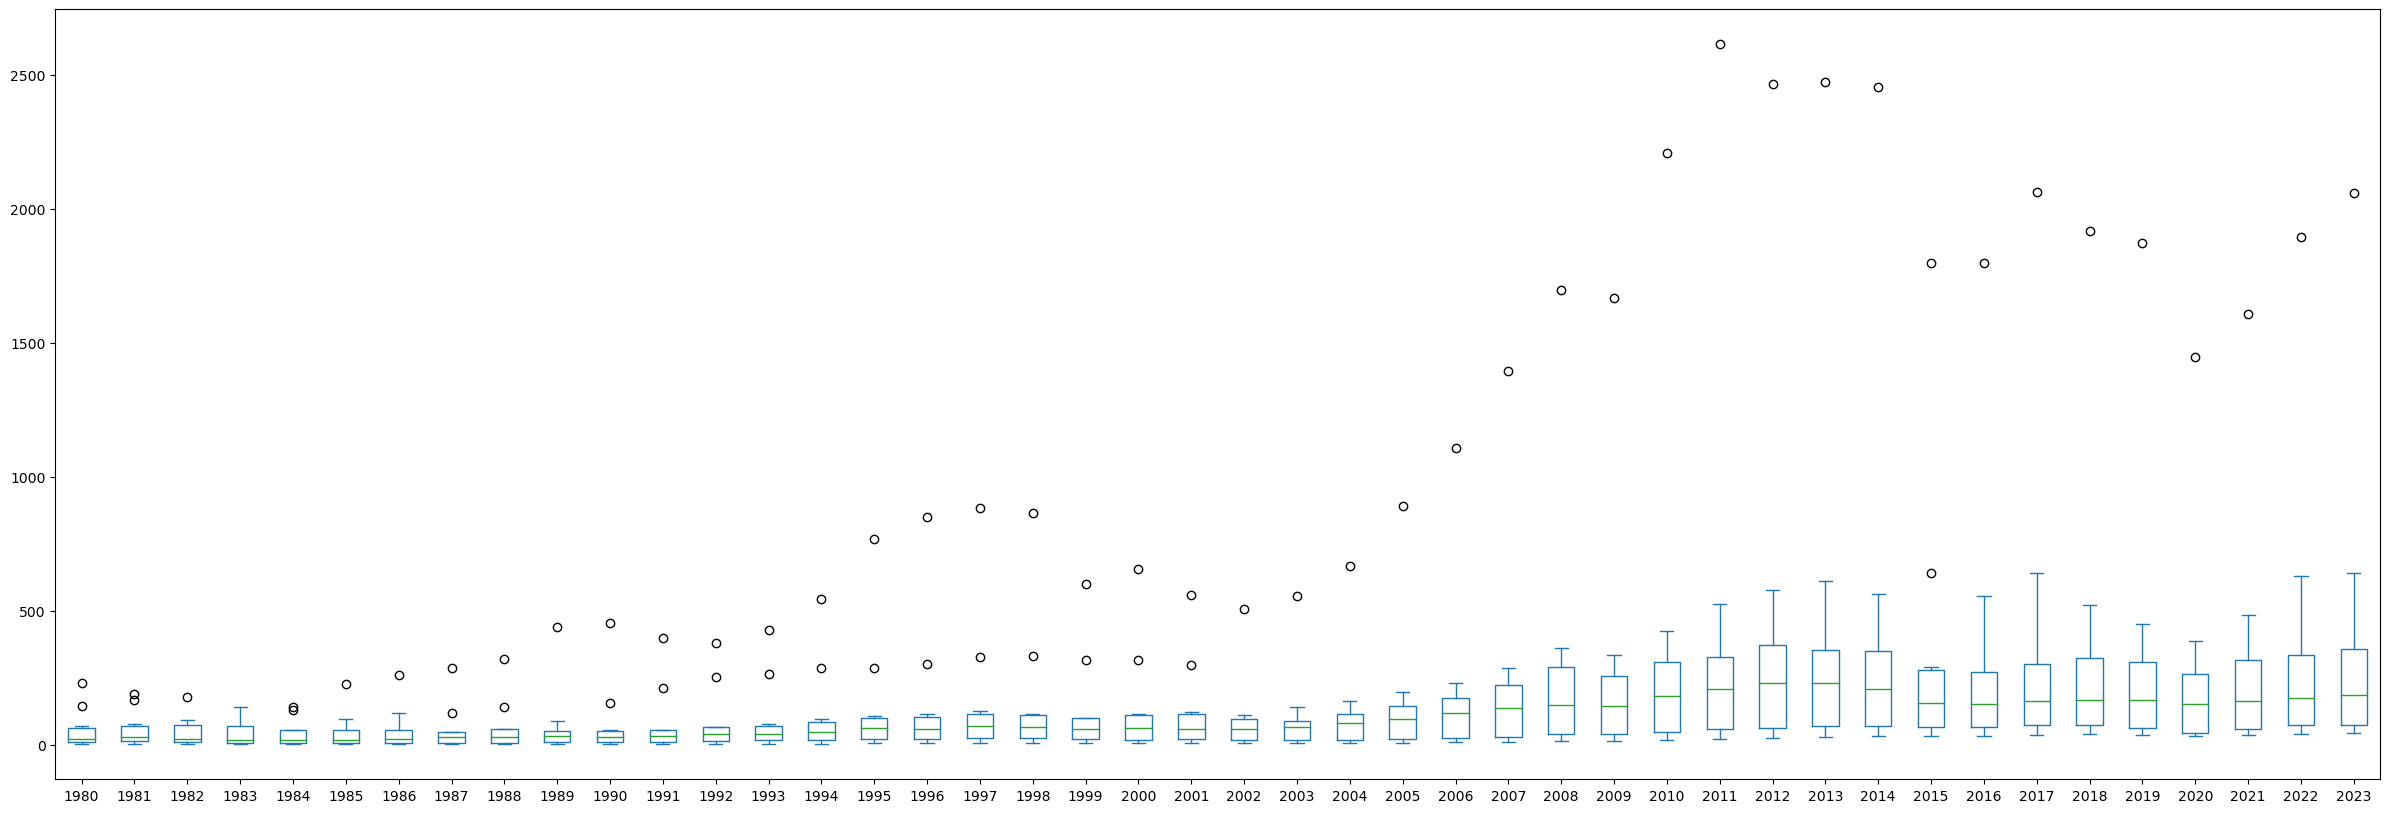

In [96]:
#6. buscar outliers  o dispersión con box plot de columnas
pib_abyayala.plot(kind='box', figsize=(30,10))
plt.show()

In [97]:
#7. Eliminar quartiles fuera de rango como outlier
q1 = pib_abyayala.quantile(0.25)
q3 = pib_abyayala.quantile(0.75)
iqr = q3 - q1

In [98]:
# 8. Limpieza de nulos
outliers = pib_abyayala.where((pib_abyayala < (q1 - 1.5 * iqr)) | (pib_abyayala > (q3 + 1.5 * iqr))).notnull()
outliers = outliers.groupby(outliers.index).sum()
outliers_total = outliers.sum(axis=1)
print(outliers_total)

Country
Argentina    18
Bolivia       0
Brazil       43
Chile         0
Colombia      0
Ecuador       0
Paraguay      0
Peru          0
Uruguay       0
Venezuela     0
dtype: int64


In [99]:
abya_yala_pib = countries.loc[countries.index.isin(abya_yala)]
#abya_yala_pib = countries.drop('region', axis=1, inplace=True)
abya_yala_pib

,region,health_index,obese_rate,suicide_rate,democracies_rate,hdr_rate,life_Exp,gpi,iq_rate,"Deaths per 1,000 live births",gdp_usd,Ipc
country,,,,,,,,,,,,
Argentina,LATIN AMER. & CARIB,54.4,28.3,8.4,6.81,0.845,76.064,1.911,86.63,7.61,8549,1029.0
Bolivia,LATIN AMER. & CARIB,29.9,20.2,6.2,4.65,0.718,64.928,1.989,76.53,20.72,3018,108.0
Brazil,LATIN AMER. & CARIB,51.2,22.1,6.9,6.86,0.765,73.425,2.465,83.38,13.13,6728,6408.0
Chile,LATIN AMER. & CARIB,56.2,28.0,9.0,7.92,0.851,79.519,1.840,87.89,5.77,12880,127.0
Colombia,LATIN AMER. & CARIB,53.2,22.3,3.9,6.48,0.767,73.659,2.729,83.13,11.35,5213,124.0
Ecuador,LATIN AMER. & CARIB,50.8,19.9,7.6,5.71,0.759,77.894,1.988,78.26,11.15,5516,110.0
Paraguay,LATIN AMER. & CARIB,40.3,20.3,6.0,5.86,0.728,70.475,1.976,84.04,16.18,5225,124.0
Peru,LATIN AMER. & CARIB,54.9,19.7,2.8,6.09,0.777,73.385,2.091,81.44,9.95,6027,107.0
Uruguay,LATIN AMER. & CARIB,40.3,27.9,21.2,8.85,0.817,78.000,1.795,87.59,5.32,15648,261.0


In [100]:
# 9. Elegir el Año 2022, info completa
abya_yala_pib = pib_abyayala.loc[:, '2022']
abya_yala_pib

Country
Argentina     630.698
Bolivia        43.431
Brazil       1894.708
Chile         310.866
Colombia      342.919
Ecuador       115.469
Paraguay       41.855
Peru          239.333
Uruguay        71.161
Venezuela      82.145
Name: 2022, dtype: float64

In [101]:
#10. Cálculo del PIB total 2022
total_pib_2022 = abya_yala_pib.sum()
total_pib_2022

3772.585

In [102]:
# 11. Se divide el PIB de cada país con el total del grupo en el  2022
pib_2022_porcentaje = (abya_yala_pib/total_pib_2022)*100
pib_2022_porcentaje = pib_2022_porcentaje.sort_values(ascending=False) 
pib_2022_porcentaje

Country
Brazil       50.223070
Argentina    16.717927
Colombia      9.089762
Chile         8.240132
Peru          6.344006
Ecuador       3.060740
Venezuela     2.177419
Uruguay       1.886266
Bolivia       1.151227
Paraguay      1.109451
Name: 2022, dtype: float64

In [107]:
#12. Exportar a .csv
ruta_archivo = '../data/abya_yala_pib.csv'
abya_yala_pib.to_csv(ruta_archivo, index=False)